In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
import pathlib

from LoadData import LoadData
from matplotlib.patches import Ellipse
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
np.random.seed(0)
py.init_notebook_mode(connected=True)

In [2]:
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()

    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)

    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))


def plot_scatter(gmm, X, label=True, ax=None, title=None, EM=False, method_name=None):
    fig, ax = plt.subplots(figsize=(8,6))
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='tab10', zorder=2,
                   edgecolors="white")
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)

    if EM:
        w_factor = 0.2 / gmm.weights_.max()
        for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
            draw_ellipse(pos, covar, alpha=w * w_factor)

    ax.set_xlabel("First Principal Component")
    ax.set_ylabel("Second Principal Component")
    ax.set_title(title)

    ax.grid(True)
    fig.tight_layout()
    temp_text = title.split("\n")
    fname = temp_text[0].strip().replace(" ", "_")

    fig.savefig("{}.png".format(fname))


Attempting to load: mnist-train-data.csv

Loading Complete
Data Statistics: 
   Number of Entries: 5000 
   Shape of Entry: (785,)

Attempting to load: fashion-mnist-train-data.csv

Loading Complete
Data Statistics: 
   Number of Entries: 5000 
   Shape of Entry: (785,)



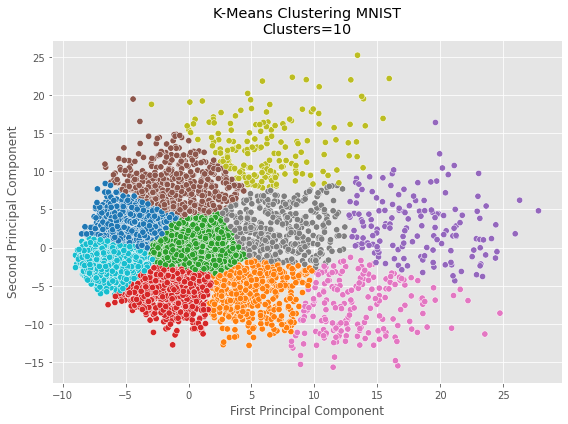

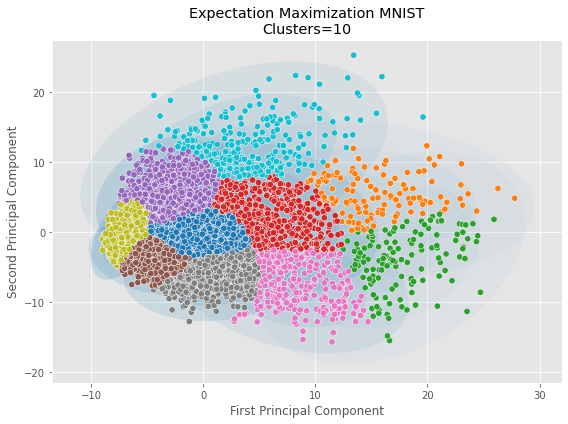

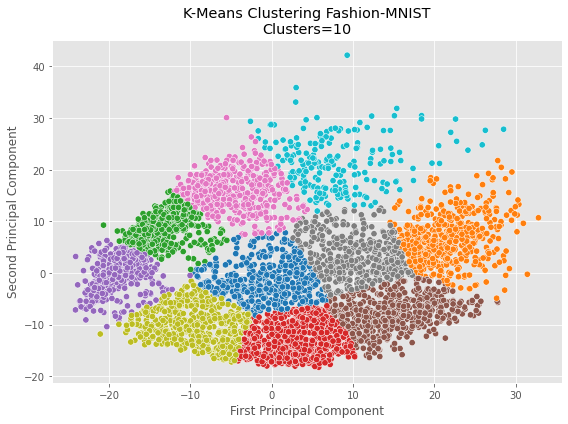

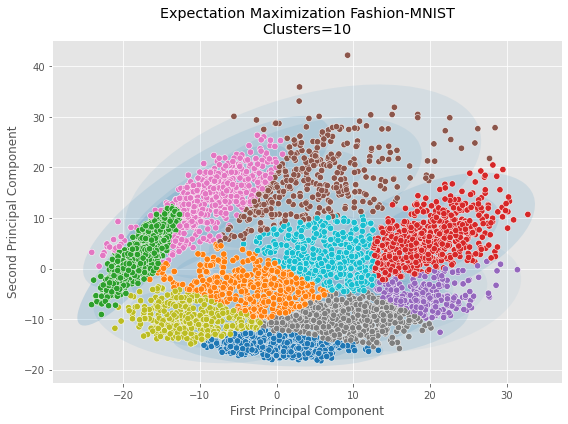

In [3]:
cwd = pathlib.Path().absolute()
for name in ["MNIST", "Fashion-MNIST"]:
    
    if name == "MNIST":
        training_data_path = "{}/mnist-train-data.csv".format(cwd)
    else:
        training_data_path = "{}/fashion-mnist-train-data.csv".format(cwd)
        
    training_labels, training_data, training_combined = LoadData(training_data_path, normalize=True, size=5000)
    
    data_x = training_data

    n_components = data_x.shape[1] - 1
    dataset_name = name

    # Call the PCA method with 2 components.
    pca = PCA(n_components=2)
    x_2 = pca.fit(data_x).transform(data_x)

    # KMEANS

    # Set a KMeans clustering with 10 components cuz there are 10 class labels
    n_clusters = 10
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans_9 = kmeans.fit_predict(x_2)
    plot_scatter(kmeans, x_2, title="K-Means Clustering {}\nClusters={}".format(dataset_name, n_clusters))

    # Expectation Maximization
    em_components = 10
    gmm = GaussianMixture(n_components=em_components, random_state=0)
    plot_scatter(gmm, x_2, title="Expectation Maximization {}\nClusters={}".
                 format(dataset_name, em_components), EM=True)